# Pre Trabajo Práctico 1
##### Daniel Caicedo - Ignacio Chiapella - Miguel Guerrero - Juan Knebel

In [147]:
# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

# Archivos
import urllib.request
import glob

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances


## Funciones para cluster

In [148]:
def silhouette_plot(data, cluster_labels, ax=None):
    '''
    Funcion que grafica el valor de silhouette por cluster
    '''
    if ax is None:
        ax = plt.gca()

    n_clusters = len(np.unique(cluster_labels))
    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color,
                         alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("Los coeficientes de silhouette por cluster")
    ax.set_ylabel("Cluster")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
    ax.annotate('Silhouette avg',
                xytext=(silhouette_avg, y_lower * 1.025),
                xy=(0, 0),
                ha='center',
                alpha=0.8,
                c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax

In [149]:
def table_with_clusters_labels(classes, cluster_lables):
    '''
    Funcion que retorna la tabla cruzada de los labels de los 
    cluster vs la clase de cada uno de los elementos
    '''
    new_data_frame = pd.DataFrame({'Genero': classes, 'Clusters': cluster_lables})
    return pd.crosstab(new_data_frame['Genero'], new_data_frame['Clusters'])

In [150]:
def explore_cluster(data, classes, n_clusters, cluster):
    '''
    Funcion que inicializa las figuras y graficos que se van a mostrar
    '''
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(14, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_by_cluster = silhouette_plot(data, cluster.labels_, ax1)

    plt.show()

## Audio Features Clustering

In [151]:
metadata = pd.read_csv("../data/audio_features/metadata.csv", index_col='id')
audio_features = pd.read_csv("../data/audio_features/audio_features-reduce.csv", index_col='id')
metadata = metadata.loc[:,['album','artists','name','popularity','genre']]
audio_with_genre = pd.concat([audio_features,metadata.genre],axis=1)

#audio_with_genre

### Jerarquico

## Graficos de Dendogramas

In [152]:
# method = single / complete / average  / ward


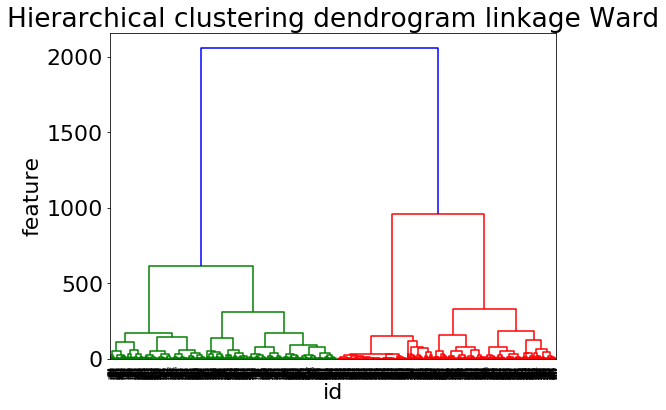

In [153]:
#audio_features
from sklearn.cluster import AgglomerativeClustering
import warnings
import scipy.cluster.hierarchy as sch
warnings.filterwarnings('ignore')

plt.title('Hierarchical clustering dendrogram linkage Ward')
plt.xlabel('id')
plt.ylabel('feature')

linkage_ward = sch.linkage(audio_features, method='ward')
linkage_average = sch.linkage(audio_features, method='average')
linkage_single = sch.linkage(audio_features, method='single')
linkage_complete = sch.linkage(audio_features, method='complete')

dendrogram_ward = sch.dendrogram(linkage_ward)

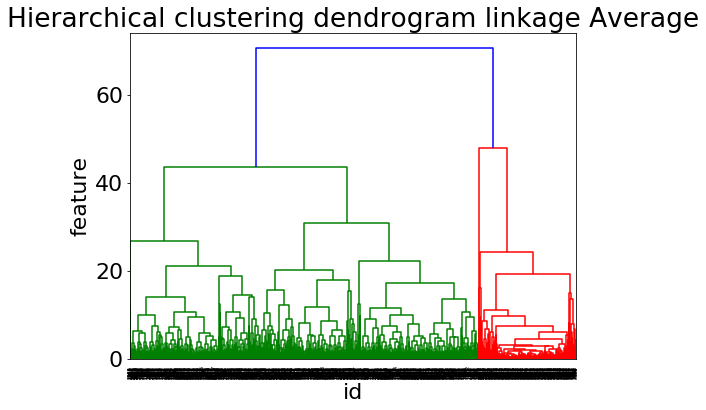

In [154]:
plt.title('Hierarchical clustering dendrogram linkage Average')
plt.xlabel('id')
plt.ylabel('feature')
dendrogram_average = sch.dendrogram(linkage_average)

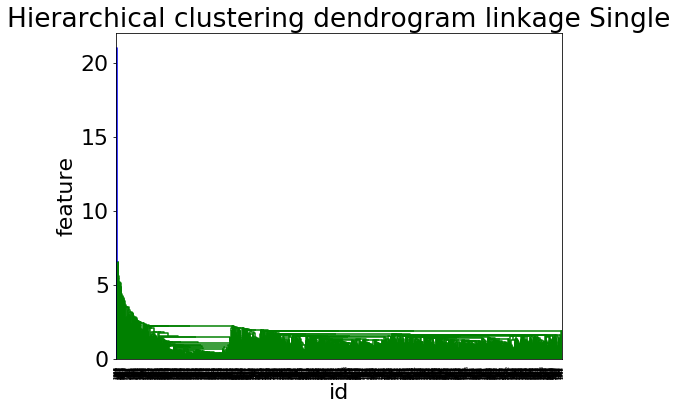

In [155]:
plt.title('Hierarchical clustering dendrogram linkage Single')
plt.xlabel('id')
plt.ylabel('feature')
dendrogram_single = sch.dendrogram(linkage_single)

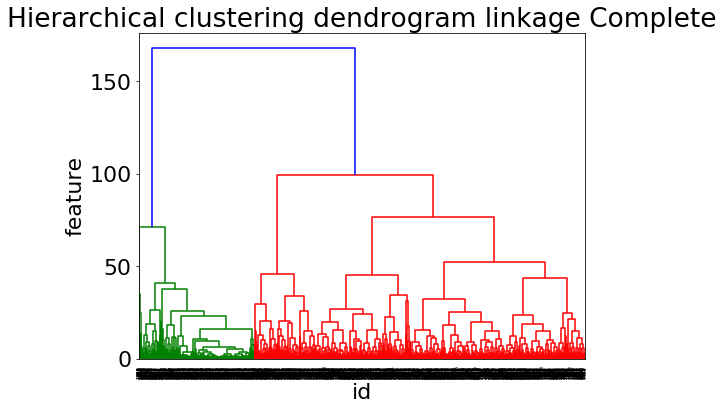

In [156]:
plt.title('Hierarchical clustering dendrogram linkage Complete')
plt.xlabel('id')
plt.ylabel('feature')
dendrogram_complete = sch.dendrogram(linkage_complete)

In [181]:
def clusteringF(linkageType, nroCluster, df):
   
    clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage=linkageType, n_clusters=nroCluster).fit(df)
    return clustering


In [182]:
# ward / average / single / complete
#clustering_euclidean = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
#            connectivity=None, linkage='ward', n_clusters=4).fit(audio_features)

clustering_ward_2 = clusteringF('ward',2, audio_features )
clustering_ward_3 = clusteringF('ward',3, audio_features)
clustering_ward_4 = clusteringF('ward',4, audio_features)
clustering_ward_5 = clusteringF('ward',5, audio_features)
clustering_ward_6 = clusteringF('ward',6, audio_features)
#clustering_average = clusteringF('average',3)
#clustering_single = clusteringF('single',3)
#clustering_complete = clusteringF('complete',3)
#clustering

In [183]:
cross_table_ward = table_with_clusters_labels(audio_with_genre.genre, clustering_ward_3.labels_)
#cross_table_average = table_with_clusters_labels(audio_with_genre.genre, clustering_average.labels_)
#cross_table_single = table_with_clusters_labels(audio_with_genre.genre, clustering_single.labels_)
#cross_table_complete = table_with_clusters_labels(audio_with_genre.genre, clustering_complete.labels_)

cross_table_ward

Clusters,0,1,2
Genero,,,
ambient,274,154,32
classical,308,72,25
drum-and-bass,42,55,354
jazz,240,153,34
world-music,255,175,33


In [160]:
print("Indice de rand para cluster de tamaño 2", adjusted_rand_score(audio_with_genre.genre, clustering_ward_2.labels_))
print("Indice de rand para cluster de tamaño 3", adjusted_rand_score(audio_with_genre.genre, clustering_ward_3.labels_))

Indice de rand para cluster de tamaño 2 0.07813374645629846
Indice de rand para cluster de tamaño 3 0.13173204451644593


In [176]:
df_temp2 = pd.DataFrame({'Genero': audio_with_genre.genre, 'Clusters': clustering_ward_2.labels_})
cross_tab2 = pd.crosstab(df_temp2['Genero'], df_temp2['Clusters'])
cross_tab2

df_temp3 = pd.DataFrame({'Genero': audio_with_genre.genre, 'Clusters': clustering_ward_3.labels_})
cross_tab3 = pd.crosstab(df_temp3['Genero'], df_temp3['Clusters'])
cross_tab3

def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

print("Indice VanDongen para Algoritmo Jerarquico con 2 clusters:", vanDongen(cross_tab2))
print("Indice VanDongen para Algoritmo Jerarquico con 3 clusters:", vanDongen(cross_tab3))

Indice VanDongen para Algoritmo Jerarquico con 2 clusters: 0.780565371024735
Indice VanDongen para Algoritmo Jerarquico con 3 clusters: 0.7575971731448763


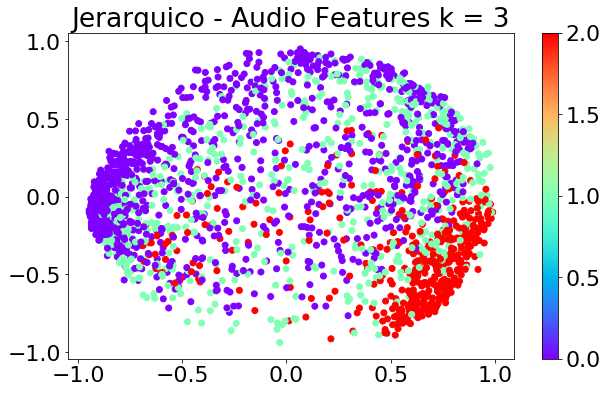

In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc


# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(audio_features) 

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
    
# Visualizing the clustering 
plt.figure(figsize =(10, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = clustering_ward_3.labels_, cmap ='rainbow') 
plt.colorbar()
plt.title("Jerarquico - Audio Features k = 3")
plt.show()


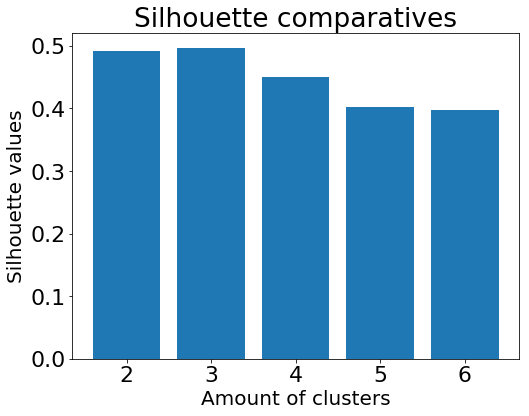

In [105]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, clustering_ward_2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, clustering_ward_3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, clustering_ward_4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, clustering_ward_5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, clustering_ward_6.fit_predict(X_principal))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette comparatives')
plt.xlabel('Amount of clusters', fontsize = 20) 
plt.ylabel('Silhouette values', fontsize = 20) 
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5566089948432339
For n_clusters = 3 The average silhouette_score is : 0.5362466648904697
For n_clusters = 4 The average silhouette_score is : 0.4712631868078179


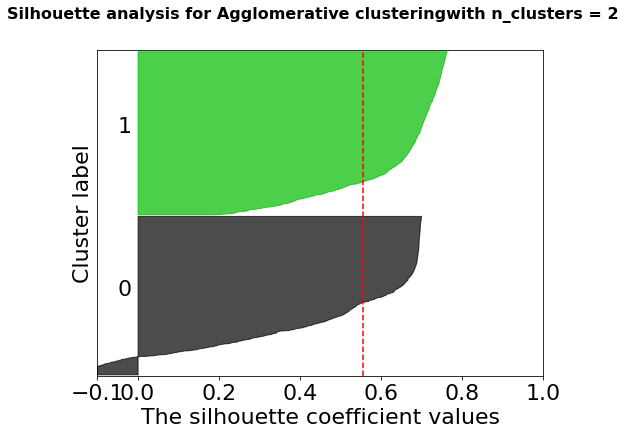

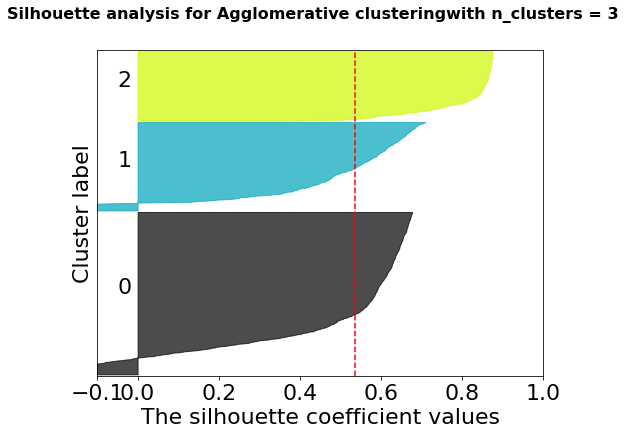

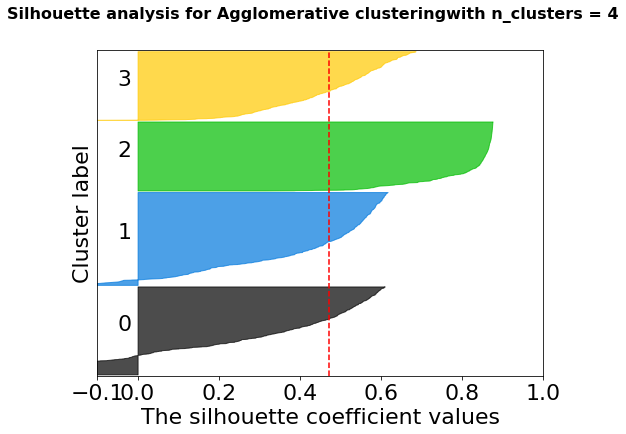

In [106]:
np.random.seed(139573)
range_n_clusters = [2, 3, 4]
X=audio_features
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #clusterer = KMedoids(n_clusters=n_clusters, metric='euclidean', init='random', max_iter=3000, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)
    
    clusterer = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Labeling the clusters
    centers = clusterer.labels_

    plt.suptitle(("Silhouette analysis for Agglomerative clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=16, fontweight='bold')

plt.show()

In [24]:
#explore_cluster(audio_features, audio_with_genre.genre, 4, clustering_euclidean)

## Audio Analysis Clustering

In [83]:
metadata = pd.read_csv("../data/audio_analysis/metadata.csv", index_col='id')
df_timbres_avg = pd.read_csv("../data/audio_analysis/timbre_avg.csv", index_col='id')
df_timbres_std_dev = pd.read_csv("../data/audio_analysis/timbre_std_dev.csv", index_col='id')
df_pitches_avg = pd.read_csv("../data/audio_analysis/pitches_avg.csv", index_col='id')
df_pitches_std_dev = pd.read_csv("../data/audio_analysis/pitches_std_dev.csv", index_col='id')

metadata = metadata.loc[:,['album','artists','name','popularity','genre']]
df_timbres_avg_with_genre = pd.merge(left=df_timbres_avg,right=metadata['genre'], left_on='id', right_on='id')
df_timbres_std_dev_with_genre = pd.merge(left=df_timbres_std_dev,right=metadata['genre'], left_on='id', right_on='id')
df_pitches_avg_with_genre = pd.merge(left=df_pitches_avg,right=metadata['genre'], left_on='id', right_on='id')
df_pitches_std_dev_with_genre = pd.merge(left=df_pitches_std_dev,right=metadata['genre'], left_on='id', right_on='id')

### Jerarquico

In [85]:
# df_timbres_avg
# df_timbres_std_dev
# df_pitches_avg
# df_pitches_std_dev

hc_timbres_avg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', n_clusters=3).fit(df_timbres_avg)

hc_timbres_std_dev = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', n_clusters=3).fit(df_timbres_std_dev)

hc_pitches_avg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', n_clusters=3).fit(df_pitches_avg)

hc_pitches_std_dev = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', n_clusters=3).fit(df_pitches_std_dev)

#cl_df_timbres_avg

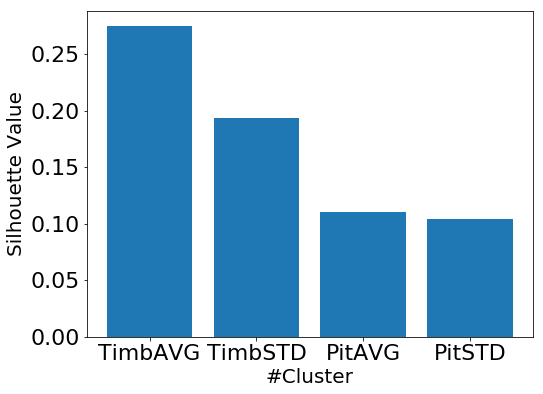

In [94]:
k = ["TimbAVG", "TimbSTD", "PitAVG", "PitSTD"]

silhouette_scores = [
    silhouette_score(df_timbres_avg, hc_timbres_avg.labels_),
    silhouette_score(df_timbres_std_dev, hc_timbres_std_dev.labels_),
    silhouette_score(df_pitches_avg, hc_pitches_avg.labels_),
    silhouette_score(df_pitches_std_dev, hc_pitches_std_dev.labels_)
]

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('#Clusters', fontsize = 20) 
plt.ylabel('Silhouette Value', fontsize = 20) 
plt.show()

In [177]:
print("Indice de rand para cluster de timbres avg de tamaño 3:", adjusted_rand_score(df_timbres_avg_with_genre.genre, hc_timbres_avg.labels_))
print("Indice de rand para cluster de timbres std de tamaño 3:", adjusted_rand_score(df_timbres_std_dev_with_genre.genre, hc_timbres_std_dev.labels_))
print("Indice de rand para cluster de pitches avg de tamaño 3:", adjusted_rand_score(df_pitches_avg_with_genre.genre, hc_pitches_avg.labels_))
print("Indice de rand para cluster de pitches std de tamaño 3:", adjusted_rand_score(df_pitches_std_dev_with_genre.genre, hc_pitches_std_dev.labels_))

Indice de rand para cluster de timbres avg de tamaño 3: 0.16907683474246418
Indice de rand para cluster de timbres std de tamaño 3: 0.0666781171424646
Indice de rand para cluster de pitches avg de tamaño 3: 0.07541930474353052
Indice de rand para cluster de pitches std de tamaño 3: 0.02314660957024765


In [178]:
cross_table_timbres_avg = table_with_clusters_labels(df_timbres_avg_with_genre.genre, hc_timbres_avg.labels_)
cross_table_timbres_avg

Clusters,0,1,2
Genero,,,
ambient,267,41,152
classical,319,22,64
drum-and-bass,11,440,0
jazz,265,146,15
world-music,251,170,42


In [112]:
cross_table_timbres_avg = table_with_clusters_labels(df_timbres_std_dev_with_genre.genre, hc_timbres_std_dev.labels_)
cross_table_timbres_avg

Clusters,0,1,2
Genero,,,
ambient,84,224,152
classical,91,216,98
drum-and-bass,155,249,47
jazz,295,56,75
world-music,262,170,31


In [113]:
cross_table_timbres_avg = table_with_clusters_labels(df_pitches_avg_with_genre.genre, hc_pitches_avg.labels_)
cross_table_timbres_avg

Clusters,0,1,2
Genero,,,
ambient,240,117,103
classical,234,54,117
drum-and-bass,80,355,16
jazz,233,149,44
world-music,154,202,107


In [114]:
cross_table_timbres_avg = table_with_clusters_labels(df_pitches_std_dev_with_genre.genre, hc_pitches_std_dev.labels_)
cross_table_timbres_avg

Clusters,0,1,2
Genero,,,
ambient,301,74,85
classical,227,115,63
drum-and-bass,423,27,1
jazz,292,127,7
world-music,318,112,33


In [196]:
complete_feature = pd.merge(audio_features, df_timbres_avg, on='id', how='inner')
complete_feature_with_genre = pd.merge(audio_with_genre, df_timbres_avg, on='id', how='inner')

In [197]:
full_clustering_ward_2 = clusteringF('ward',2, complete_feature)
full_clustering_ward_3 = clusteringF('ward',3, complete_feature)
full_clustering_ward_4 = clusteringF('ward',4, complete_feature)
full_clustering_ward_5 = clusteringF('ward',5, complete_feature)
full_clustering_ward_6 = clusteringF('ward',6, complete_feature)

In [201]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(complete_feature) 
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled)   
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

For n_clusters = 2 The average silhouette_score is : 0.4582894707326869
For n_clusters = 3 The average silhouette_score is : 0.4968615732415862
For n_clusters = 4 The average silhouette_score is : 0.4192305629523233
For n_clusters = 5 The average silhouette_score is : 0.3997819098883464
For n_clusters = 6 The average silhouette_score is : 0.38227583204068905


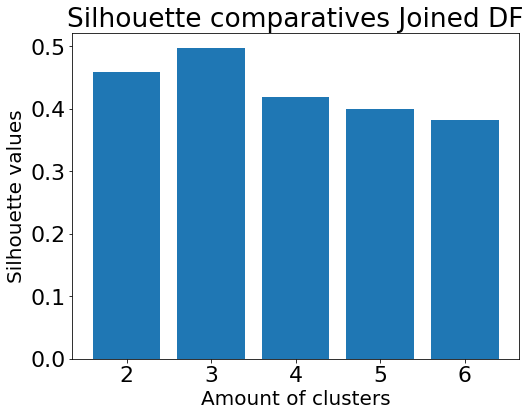

In [205]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, full_clustering_ward_2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, full_clustering_ward_3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, full_clustering_ward_4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, full_clustering_ward_5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, full_clustering_ward_6.fit_predict(X_principal))) 

print("For n_clusters =", 2, "The average silhouette_score is :", silhouette_scores[0])
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_scores[1])
print("For n_clusters =", 4, "The average silhouette_score is :", silhouette_scores[2])
print("For n_clusters =", 5, "The average silhouette_score is :", silhouette_scores[3])
print("For n_clusters =", 6, "The average silhouette_score is :", silhouette_scores[4])


# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.title('Silhouette comparatives Joined DF')
plt.xlabel('Amount of clusters', fontsize = 20) 
plt.ylabel('Silhouette values', fontsize = 20) 
plt.show()

In [207]:
df_temp2 = pd.DataFrame({'Genero': complete_feature_with_genre.genre, 'Clusters': full_clustering_ward_2.labels_})
cross_tab2 = pd.crosstab(df_temp2['Genero'], df_temp2['Clusters'])
cross_tab2

df_temp3 = pd.DataFrame({'Genero': complete_feature_with_genre.genre, 'Clusters': full_clustering_ward_3.labels_})
cross_tab3 = pd.crosstab(df_temp3['Genero'], df_temp3['Clusters'])
cross_tab3

def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd


print("Indice de rand para cluster de tamaño 2", adjusted_rand_score(complete_feature_with_genre.genre, full_clustering_ward_2.labels_))
print("Indice de rand para cluster de tamaño 3", adjusted_rand_score(complete_feature_with_genre.genre, full_clustering_ward_3.labels_))

print("Indice VanDongen para Algoritmo Jerarquico con 2 clusters:", vanDongen(cross_tab2))
print("Indice VanDongen para Algoritmo Jerarquico con 3 clusters:", vanDongen(cross_tab3))

Indice de rand para cluster de tamaño 2 0.18554182458433713
Indice de rand para cluster de tamaño 3 0.31604208434125886
Indice VanDongen para Algoritmo Jerarquico con 2 clusters: 0.6502027276078143
Indice VanDongen para Algoritmo Jerarquico con 3 clusters: 0.519489247311828


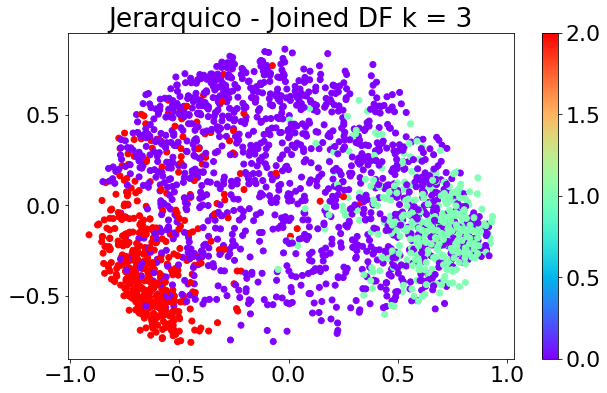

In [202]:
# Analisis de PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
    
# Visualizing the clustering 
plt.figure(figsize =(10, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = clustering_fullwar_3.labels_, cmap ='rainbow') 
plt.colorbar()
plt.title("Jerarquico - Joined DF k = 3")
plt.show()

In [208]:
cross_table_full_clustering = table_with_clusters_labels(complete_feature_with_genre.genre, full_clustering_ward_3.labels_)
cross_table_full_clustering

Clusters,0,1,2
Genero,,,
ambient,334,24,102
classical,386,17,2
drum-and-bass,0,22,429
jazz,158,232,36
world-music,93,334,36
